Terry Hood Jupyter Notebook 

## Multi-Layer Perceptron (MLP) model

Step 1: Install Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

Step 2: Prepare Your Data

In [2]:
# Load the dataset
clean_df = pd.read_csv('../clean_df.csv')
clean_df.head(5)

,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,3,1,7,7,6,1,0,2,2,1,...,0,0,0,0,0,0,9,4,0,1
1,3,4,7,8,1,1,0,2,2,1,...,0,0,0,0,0,1,9,4,0,3
2,3,4,7,7,3,1,0,1,2,2,...,0,0,0,0,0,0,9,4,0,2
3,5,1,7,4,7,0,0,1,2,2,...,0,0,0,0,0,0,9,4,0,1
4,3,4,7,3,7,1,1,4,2,1,...,0,0,0,0,0,0,9,4,0,3


In [3]:
# Set the features variable 
X = clean_df.drop(columns='REASON')
# Set the target variable
y = clean_df["REASON"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 3: Define Define and Train the MLP Model

In [5]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


In [6]:
# New history to store the loss and accuracy
# Manually track the loss and accuracy
history = {'loss': [], 'accuracy': []}
num_epochs = 10

for epoch in range(num_epochs):
    mlp.fit(X_train, y_train)
    
    # Predict on the training data
    train_predictions = mlp.predict(X_train)
    train_probabilities = mlp.predict_proba(X_train)
    
    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_train, train_predictions)
    loss = log_loss(y_train, train_probabilities)
    
    # Store the metrics
    history['loss'].append(loss)
    history['accuracy'].append(accuracy)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Convert history to a DataFrame for further analysis or plotting
history_df = pd.DataFrame(history)
print(history_df)

Epoch 1/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 2/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 3/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 4/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 5/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 6/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 7/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 8/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 9/10, Loss: 0.3957, Accuracy: 0.8098
Epoch 10/10, Loss: 0.3957, Accuracy: 0.8098
       loss  accuracy
0  0.395691  0.809838
1  0.395691  0.809838
2  0.395691  0.809838
3  0.395691  0.809838
4  0.395691  0.809838
5  0.395691  0.809838
6  0.395691  0.809838
7  0.395691  0.809838
8  0.395691  0.809838
9  0.395691  0.809838


Predict and Evaluate the MLP Model

In [7]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = mlp.predict(X_test)
print(f'Accuracy: {np.mean(y_pred == y_test):.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.77      0.68      0.72    708990
           1       0.83      0.88      0.85   1223451

    accuracy                           0.81   1932441
   macro avg       0.80      0.78      0.79   1932441
weighted avg       0.81      0.81      0.81   1932441



In [8]:
# Check to see if data is balanced
clean_df["REASON"].value_counts()

1    4078702
0    2362767
Name: REASON, dtype: int64

In [9]:
# Save the model
import joblib
joblib.dump(mlp, 'mlp_model_vsc_test.pkl')

['mlp_model_vsc_test.pkl']

       loss  accuracy
0  0.395691  0.809838
1  0.395691  0.809838
2  0.395691  0.809838
3  0.395691  0.809838
4  0.395691  0.809838
5  0.395691  0.809838
6  0.395691  0.809838
7  0.395691  0.809838
8  0.395691  0.809838
9  0.395691  0.809838


<Axes: >

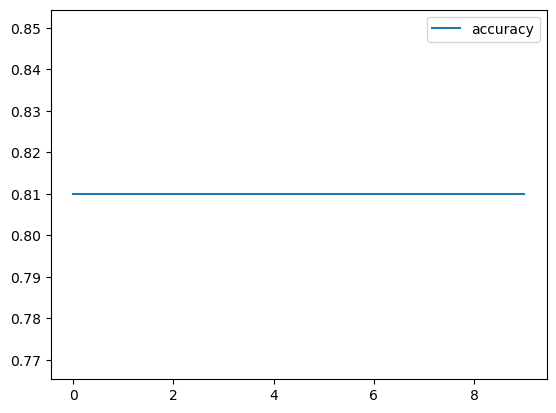

In [10]:
# # Access the history dictionary
# history_dict = history.history

# # Create a DataFrame from the history dictionary
# history_df = pd.DataFrame(history_dict)

# Display the first few rows of the DataFrame
print(history_df.head(10))

# Assuming "accuracy" is a key in your `cleaned_df` DataFrame, plot the accuracy
history_df.plot(y="accuracy")

<Axes: >

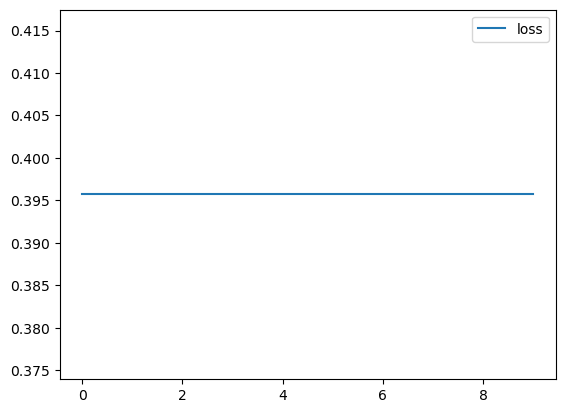

In [11]:
history_df.plot(y="loss")

In [12]:
# Import necessary libraries
import joblib

# Load the model from the file
joblib_file = 'mlp_model_vsc_test.pkl'
mlp_loaded = joblib.load(joblib_file)
print("Model loaded successfully")

# Use the loaded model to make predictions
y_pred = mlp_loaded.predict(X_test)
print("Predictions made using the loaded model:", y_pred)

# Evaluate the loaded model
accuracy = mlp_loaded.score(X_test, y_test)
print(f"Accuracy of the loaded model: {accuracy:.4f}")

Model loaded successfully
Predictions made using the loaded model: [0 0 0 ... 1 1 0]
Accuracy of the loaded model: 0.8087


## TensorFlow / Keras model

TensorFlow/Keras:

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set input nodes to the number of features
input_nodes = len(X.columns)
display(input_nodes)

68

In [14]:
# Define the MLP model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of neurons to match the number of classes in your dataset
])

c:\Users\tdhdp\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Check the structure of the Sequential model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         6,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,103 (47.28 KB)

 Trainable params: 12,103 (47.28 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 134s 1ms/step - accuracy: 0.7796 - loss: 0.4438 - val_accuracy: 0.8022 - val_loss: 0.4060
Epoch 2/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.8053 - loss: 0.4012 - val_accuracy: 0.8078 - val_loss: 0.3968
Epoch 3/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.8090 - loss: 0.3959 - val_accuracy: 0.8105 - val_loss: 0.3940
Epoch 4/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.8111 - loss: 0.3927 - val_accuracy: 0.8119 - val_loss: 0.3922
Epoch 5/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.8126 - loss: 0.3901 - val_accuracy: 0.8115 - val_loss: 0.3923
Epoch 6/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 133s 1ms/step - accuracy: 0.8139 - loss: 0.3891 - val_accuracy: 0.8128 - val_loss: 0.3904
Epoch 7/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.8145 - loss: 0.3877 - val_accuracy: 0.8141 - val_loss: 0.3885
Epoch 8/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 13

In [18]:
# Save the model
model.save('mlp_model.keras')


   accuracy      loss  val_accuracy  val_loss
0  0.793139  0.421042      0.802249  0.406038
1  0.806457  0.399799      0.807774  0.396767
2  0.809741  0.394950      0.810501  0.393998
3  0.811476  0.392163      0.811896  0.392180
4  0.812710  0.390203      0.811479  0.392332
5  0.813625  0.388909      0.812792  0.390367
6  0.814222  0.387965      0.814107  0.388543
7  0.814755  0.387197      0.814084  0.388930
8  0.815044  0.386708      0.814540  0.388175
9  0.815386  0.386328      0.815573  0.385874


<Axes: >

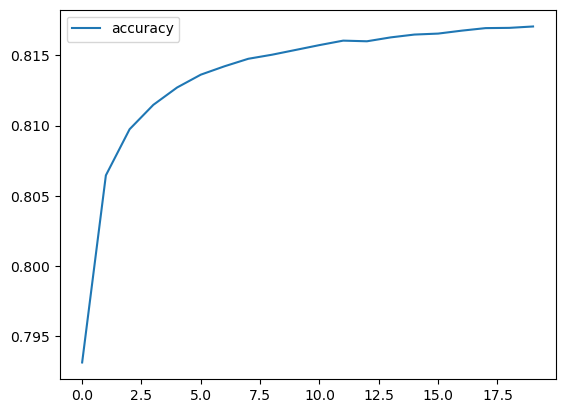

In [19]:
# Access the history dictionary
history_dict = history.history

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history_dict)

# Display the first few rows of the DataFrame
print(history_df.head(10))

# Assuming "accuracy" is a key in your `cleaned_df` DataFrame, plot the accuracy
history_df.plot(y="accuracy")

<Axes: >

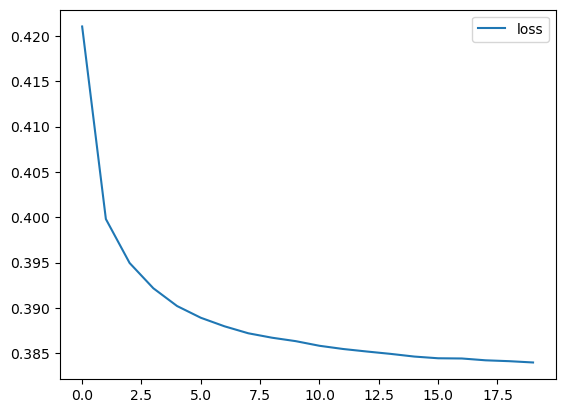

In [20]:
history_df.plot(y="loss")

Predict and Evaluate the TensorFlow/Keras Model

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes):.2f}')

60389/60389 ━━━━━━━━━━━━━━━━━━━━ 44s 720us/step
              precision    recall  f1-score   support

           0       0.79      0.68      0.73    708990
           1       0.83      0.89      0.86   1223451

    accuracy                           0.82   1932441
   macro avg       0.81      0.79      0.80   1932441
weighted avg       0.81      0.82      0.81   1932441

Accuracy: 0.82


Model Load and Prep for Testing

In [23]:

# # Load the model
# loaded_model = load_model('mlp_model.keras')

# # Prepare the test data
# # Assuming X_test is your test features and you used StandardScaler for preprocessing
# scaler = StandardScaler()
# X_test = scaler.transform(X_test)

# # Make predictions
# y_pred = loaded_model.predict(X_test)

# # Convert probabilities to class labels
# y_pred_classes = (y_pred > 0.5).astype(int)  # Use np.argmax for multi-class

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_classes)
# print(f'Accuracy: {accuracy:.4f}')

# print("Classification Report:")
# print(classification_report(y_test, y_pred_classes))

# conf_matrix = confusion_matrix(y_test, y_pred_classes)
# print("Confusion Matrix:")
# print(conf_matrix)


This code covers the entire process from data preparation to making predictions on new data for both Scikit-learn and TensorFlow/Keras implementations of an MLP model.

<!-- Step 4: Evaluate and Save the Model
After training, evaluate the model’s performance and save it if necessary. -->